#cars Recognizer
The goal of this project is to classify the logos of 20 different car brands from around the world. The types are following: <br/>

* Audi car logo
* BMW car logo
* Chevrolet car logo
* Dodge car logo
* Ford car logo
* Honda car logo
* Hyundai car logo
* Jaguar car logo
* Jeep car logo
* Kia car logo
* Land Rover car logo
* Lexus car logo
* Mazda car logo
* Mercedes-Benz car logo
* Nissan car logo
* Porsche car logo
* Subaru car logo
* Tesla car logo
* Toyota car logo
* Volkswagen car logo




##Setting up the necessary things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32
version = 1

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourseML/week-8/logo classification

/content/drive/My Drive/MasterCourseML/week-8/logo classification


In [ ]:
ls

 data/  'data loaders'/   models/   test_images/


In [ ]:
# not necessary. to zip the data that i have collected and save it to drive
# !zip -r '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/data'

##Download Images from Browser


You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API.

For ease, we are going to use DuckDuckGo Image Search.

Good news! Fastai has a function to do this for us.

To use DuckDuckGo to download images, use the search_images_ddg function from

---

fastbook:

In [ ]:
car_logo = [
"Audi car logo",
"BMW car logo",
"Chevrolet car logo",
"Dodge car logo",
"Ford car logo",
"Honda car logo",
"Hyundai car logo",
"Jaguar car logo",
"Jeep car logo",
"Kia car logo",
"Land Rover car logo",
"Lexus car logo",
"Mazda car logo",
"Mercedes-Benz car logo",
"Nissan car logo",
"Porsche car logo",
"Subaru car logo",
"Tesla car logo",
"Toyota car logo",
"Volkswagen car logo"]

len(car_logo)

20

In [ ]:
images = search_images_ddg(car_logo[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://img.favpng.com/3/1/11/audi-car-logo-scalable-vector-graphics-png-favpng-EKDqNTKxY9yEtE4c7L3XpKYt2.jpg'

In [ ]:
dest = "logo.jpg"
download_url(images[1], dest, show_progress=False)

Path('logo.jpg')

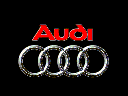

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [ ]:
#combine all of them for collecting images

data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for logo_type in car_logo:

  dest = f"{data_path}/{logo_type}"              #in data_path folder create folders for each cap_type and the images for each cap_type will store there
  if not os.path.exists(dest):
    os.mkdir(dest)

  if len(os.listdir(dest)) == 0:

    try:
      cap_image_urls = search_images_ddg(logo_type)    #max_image = 500
      download_images(dest, urls = cap_image_urls)

    except:
      continue
  else:
        print(f"Images for {logo_type} already exist. Skipping download.")

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3660) [Path('data/Audi car logo/1c3c3fc8-6e61-4148-8768-bd013c1c4688.png'),Path('data/Audi car logo/2f273e7a-39ac-460e-9042-480ed93b92c2.png'),Path('data/Audi car logo/9d6aa2b7-b4ed-49c0-8692-e31ed6427893.png'),Path('data/Audi car logo/44b3bc75-48a8-4ba7-bca1-8785ef2e71ef.jpg'),Path('data/Audi car logo/6f49c3f5-ba7e-4abe-b566-c0c25fe62dbd.png'),Path('data/Audi car logo/2833d1b5-8026-48cd-bce3-588dd80eb0a7.jpg'),Path('data/Audi car logo/5982a184-9d39-49bd-8149-1d2c5cb7f359.jpg'),Path('data/Audi car logo/bc1d7f53-8c3d-4a98-b2e9-a546c8f0f26a.jpg'),Path('data/Audi car logo/c1a032db-93c8-4ff7-98f1-b03c44b79c85.jpg'),Path('data/Audi car logo/9982ed12-ca4e-4acd-8222-90078e2b3506.jpg'),Path('data/Audi car logo/d8f841dc-a2e7-4645-aa39-3e15d239cea5.jpg'),Path('data/Audi car logo/0a0d84ef-0601-4f35-9f37-92c0b8a7a3a4.png'),Path('data/Audi car logo/15492a97-e633-415a-aff0-e7a8dccb36c5.jpg'),Path('data/Audi car logo/a2c300a0-ca5d-4f41-92a6-82991131bd3b.png'),Path('data/Audi car logo/0f4902c1-9da0-

In [ ]:
failed = verify_images(image_counts)       #check how many fail images there
failed

(#61) [Path('data/Audi car logo/26ecb0ad-0934-4738-b37d-00c3f369cabc.jpg'),Path('data/Audi car logo/39de8674-61c6-4c12-b1fc-40e6d11925bc.jpg'),Path('data/BMW car logo/5a87cea8-a85d-47c2-965d-637288e3842a.jpg'),Path('data/BMW car logo/b704cbf7-f3e7-4e52-b6e4-115e2b80d8ca.svg'),Path('data/Dodge car logo/96679d4c-7fb3-45f4-8d37-bfbe43418ab0.jpg'),Path('data/Dodge car logo/18afdff3-4697-4bd4-be91-224d13e3496c.jpg'),Path('data/Dodge car logo/db71ce5a-1bff-4c3b-b2f9-368a590b0f62.jpg'),Path('data/Dodge car logo/43e1b2d4-9bb7-478b-b31e-ea9bf4dd6209.jpg'),Path('data/Ford car logo/07823795-c38b-4ab5-ada1-4f07078a53b2.png'),Path('data/Ford car logo/bad0d5c1-e780-4164-b08f-d5289695af05.jpg'),Path('data/Honda car logo/62a39888-d7fa-4cbd-9491-275990a9dbc2.png'),Path('data/Honda car logo/a359b98a-1399-4f1f-be75-9de61a8423f0.png'),Path('data/Hyundai car logo/35674bc2-97a9-44ff-9162-a81a37523efe.png'),Path('data/Hyundai car logo/2f2a99cb-ff2b-4d18-a310-1ee5756ce03a.jpg'),Path('data/Hyundai car logo/96f

In [ ]:
failed.map(Path.unlink)                    #remove all the fail images

(#61) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]